In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from keras.datasets import imdb
#loading imdb data with most frequent 10000 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# you may take top 10,000word frequently used review of movies other are discarded
#consolidating data for EDA Exploratory data analysis (EDA) is used by data scientists to analyze andinvestigate data sets and summarize their main characteristics
data = np.concatenate((X_train, X_test), axis=0)

In [4]:
# axis 0 is first running vertically downwards acrossrows (axis 0), axis 1 is second running horizontally across columns (axis 1),
label = np.concatenate((y_train, y_test), axis=0)

In [5]:
# series of no converted word to vocabulory associated with index
print("Review is",y_train[0])

Review is 1


In [6]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [7]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [8]:
# Function to perform relevant sequence adding on the data
# Now it is time to prepare our data. We will vectorize every review and fill it with zeros so that it contains exactly 10000 numbers.
# That means we fill every review that is shorter than 500 with zeros.
# We do this because the biggest review is nearly that long and every input for our neural network needsto have the same size.
# We also transform the targets into floats.
# sequences is name of method the review less than 10000 we perform padding overthere # binary vectorization code:
# VECTORIZE as one cannot feed integers into a NN
# Encoding the integer sequences into a binary matrix - one hot encoder basically
# From integers representing words, at various lengths - to a normalized one hot encoded tensor (matrix)of 10k columns
def vectorize(sequences, dimension = 10000):
  # We will vectorize every review and fill it with zerosso that it contains exactly 10,000 numbers.
  # Create an all-zero matrix of shape (len(sequences), dimension)r
  results = np.zeros((len(sequences), dimension), dtype = 'float32')
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [9]:
# Now we split our data into a training and a testing set. # The training set will contain reviews and the testing set # 
# Set a VALIDATION set
test_x = data[:10000]
test_y = label[:10000]
train_x = data[10000:]
train_y = label[10000:]
test_x.shape

(10000,)

In [10]:
test_y.shape

(10000,)

In [11]:
train_x.shape

(40000,)

In [12]:
train_y.shape

(40000,)

In [13]:
# Retrieves a dict mapping words to their index in the IMDB dataset
index = imdb.get_word_index()
# word to index

1641221/1641221 [==============================] - 0s 0us/step


In [14]:
# Create inverted index from a dictionary with document ids as keys and a list of terms as values foreach document
reverse_index = dict([(value, key) for (key, value) in index.items()])

In [15]:
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
# The indices are offset by 3 because 0, 1 and 2 are reserved indices for "padding", "start of sequence"and "unknown"

In [16]:
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [17]:
#import seaborn as sns
#Adding sequence to data
# Vectorization is the process of converting textual data into numerical vectors and is a process that is usually applied once the text is cleaned.
data = vectorize(data)
label = np.array(label).astype('float32')
#labelDF=pd.DataFrame({'label':label})
#sns.countplot(x='label', data=labelDF)

In [18]:
# Creating train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.20, random_state=1)
X_train.shape

(40000, 10000)

In [19]:
X_test.shape

(10000, 10000)

In [20]:
# Let's create sequential model
from keras.utils import to_categorical
from keras import models
from keras import layers

In [21]:
# Input - Layer
# Note that we set the input-shape to 10,000 at the input-layer because our reviews are 10,000 integerslong.
# The input-layer takes 10,000 as input and outputs it with a shape of 50.
#model = models.Sequential()
#model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
# Hidden - Layers
# Please note you should always use a dropout rate between 20% and 50%. # here in our case 0.3 means30% dropout we are using dropout to prevent overfitting.
# By the way, if you want you can build a sentiment analysis without LSTMs, then you simply need toreplace it by a flatten layer:
#model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
#model.add(layers.Dense(50, activation = "relu"))
#model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
#model.add(layers.Dense(50, activation = "relu"))

In [23]:
# Output- Layer
#model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [24]:
# We use the “adam” optimizer, an algorithm that changes the weights and biasesduring training.
# We also choose binary-crossentropy as loss (because we deal with binary classification) and accuracy as our evaluation metric.
model.compile( optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
from sklearn.model_selection import train_test_split

In [25]:
results = model.fit( X_train, y_train, epochs= 2, batch_size = 500, validation_data = (X_test, y_test))

Epoch 1/2
80/80 [==============================] - 5s 49ms/step - loss: 0.3854 - accuracy: 0.8439 - val_loss: 0.2668 - val_accuracy: 0.8980
Epoch 2/2
80/80 [==============================] - 3s 37ms/step - loss: 0.2163 - accuracy: 0.9180 - val_loss: 0.2642 - val_accuracy: 0.8981


In [26]:
# Let's check mean accuracy of our model
print(np.mean(results.history['val_accuracy'])) # Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=500)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

0.8980500102043152
20/20 [==============================] - 1s 44ms/step - loss: 0.2642 - accuracy: 0.8981
Test loss: 0.2641599774360657
Test accuracy: 0.8981000185012817


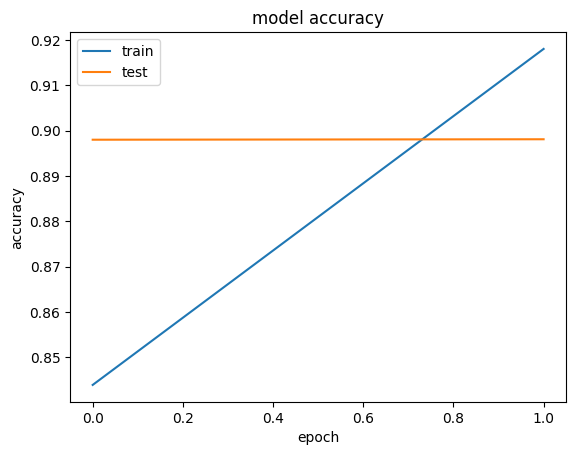

In [27]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

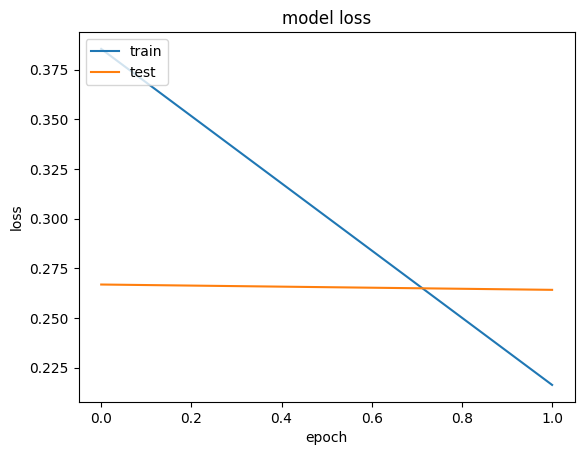

In [28]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()